In [50]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split

In [51]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'data/magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [52]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=None) 
train_Features[:2]

array([[-0.51668368, -0.32946727,  0.08735557, -0.22005053, -0.05300196,
         0.44645158,  0.21164341, -0.48086994, -1.05550228, -0.46162329],
       [ 1.89657107,  0.73069034,  0.4362866 , -1.09801922, -1.10451055,
         3.78734259, -2.65934895, -1.23373313,  1.80113059,  0.49578565]])

In [53]:
test_Features[:2]

array([[-0.80659906, -0.66880253, -0.87479689,  1.2060332 ,  0.77589811,
         0.04500916, -0.04096068,  0.25172139,  1.53719474, -1.75307022],
       [-0.85129294, -0.81409097, -1.09740177,  2.5117723 ,  3.03998976,
         0.1421369 , -0.11872137, -0.27265836, -0.58567004, -1.50035585]])

In [54]:
train_Label[:4]

array([1, 1, 0, 0])

In [55]:
train_Features.shape

(15216, 10)

In [56]:
test_Label[:4]

array([1, 1, 1, 1])

In [57]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [58]:
model = Sequential()

In [59]:
model.add(Dense(units=40, input_dim=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [60]:
model.add(Dense(units=4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [61]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 40)                440       
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 164       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [64]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=400,verbose=2)

Train on 13694 samples, validate on 1522 samples
Epoch 1/30
 - 1s - loss: 0.6897 - acc: 0.6688 - val_loss: 0.6840 - val_acc: 0.7319
Epoch 2/30
 - 0s - loss: 0.6734 - acc: 0.7483 - val_loss: 0.6526 - val_acc: 0.7825
Epoch 3/30
 - 0s - loss: 0.6277 - acc: 0.7764 - val_loss: 0.5897 - val_acc: 0.7943
Epoch 4/30
 - 0s - loss: 0.5614 - acc: 0.7884 - val_loss: 0.5174 - val_acc: 0.8009
Epoch 5/30
 - 0s - loss: 0.4956 - acc: 0.7942 - val_loss: 0.4565 - val_acc: 0.8121
Epoch 6/30
 - 0s - loss: 0.4510 - acc: 0.8004 - val_loss: 0.4231 - val_acc: 0.8114
Epoch 7/30
 - 0s - loss: 0.4308 - acc: 0.8054 - val_loss: 0.4098 - val_acc: 0.8160
Epoch 8/30
 - 0s - loss: 0.4218 - acc: 0.8087 - val_loss: 0.4026 - val_acc: 0.8127
Epoch 9/30
 - 0s - loss: 0.4163 - acc: 0.8144 - val_loss: 0.3987 - val_acc: 0.8147
Epoch 10/30
 - 0s - loss: 0.4118 - acc: 0.8158 - val_loss: 0.3942 - val_acc: 0.8180
Epoch 11/30
 - 0s - loss: 0.4075 - acc: 0.8191 - val_loss: 0.3906 - val_acc: 0.8180
Epoch 12/30
 - 0s - loss: 0.4034 - a

In [65]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

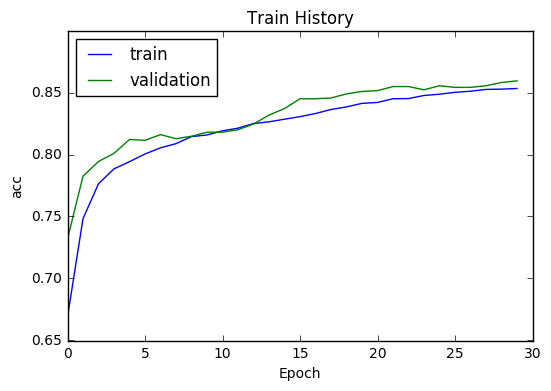

In [66]:
show_train_history(train_history,'acc','val_acc')

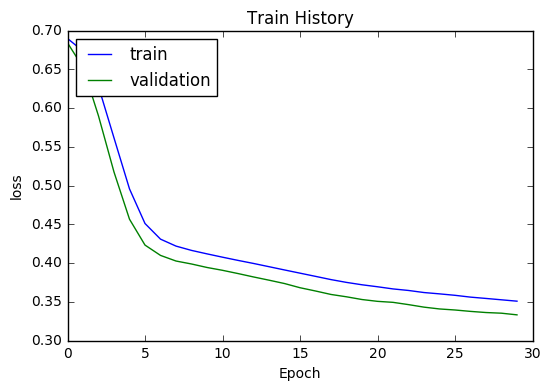

In [67]:
show_train_history(train_history,'loss','val_loss')

In [68]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3804/3804 [==============================] - 0s 65us/step


In [69]:
scores[1]

0.85488959009339